In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/letterrecognition-using-svm/letter-recognition.csv


In [2]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77065 sha256=31de5317b94c05023cf508e375452a1dd0a379facc8f6291b9c110c7581d1cac
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.14.0
    Uninstalling wrapt-1.14.0:
      Successfully uninstalled wrapt-1.14.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.2.0
    Uninstalling typing_extensions-4.2.0:
      Successfully uninstalled typing_extensions-4.2.0
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attemptin

In [3]:
from tensorflow.keras import models, layers, utils, backend as K
from tensorflow.keras import layers, callbacks

In [4]:
df = pd.read_csv('/kaggle/input/letterrecognition-using-svm/letter-recognition.csv')
df.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [5]:
df.shape

(20000, 17)

In [6]:
df.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [7]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [8]:
df['letter'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

In [9]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [10]:
#Checking for outliers
round(df.describe(),2)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,4.02,7.04,5.12,5.37,3.51,6.90,7.50,4.63,5.18,8.28,6.45,7.93,3.05,8.34,3.69,7.80
std,1.91,3.30,2.01,2.26,2.19,2.03,2.33,2.70,2.38,2.49,2.63,2.08,2.33,1.55,2.57,1.62
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,5.00,4.00,4.00,2.00,6.00,6.00,3.00,4.00,7.00,5.00,7.00,1.00,8.00,2.00,7.00
50%,4.00,7.00,5.00,6.00,3.00,7.00,7.00,4.00,5.00,8.00,6.00,8.00,3.00,8.00,3.00,8.00
75%,5.00,9.00,6.00,7.00,5.00,8.00,9.00,6.00,7.00,10.00,8.00,9.00,4.00,9.00,5.00,9.00
max,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00


There can be a possibility of outliers but we are not taking them into account for now.

Text(0, 0.5, 'letter')

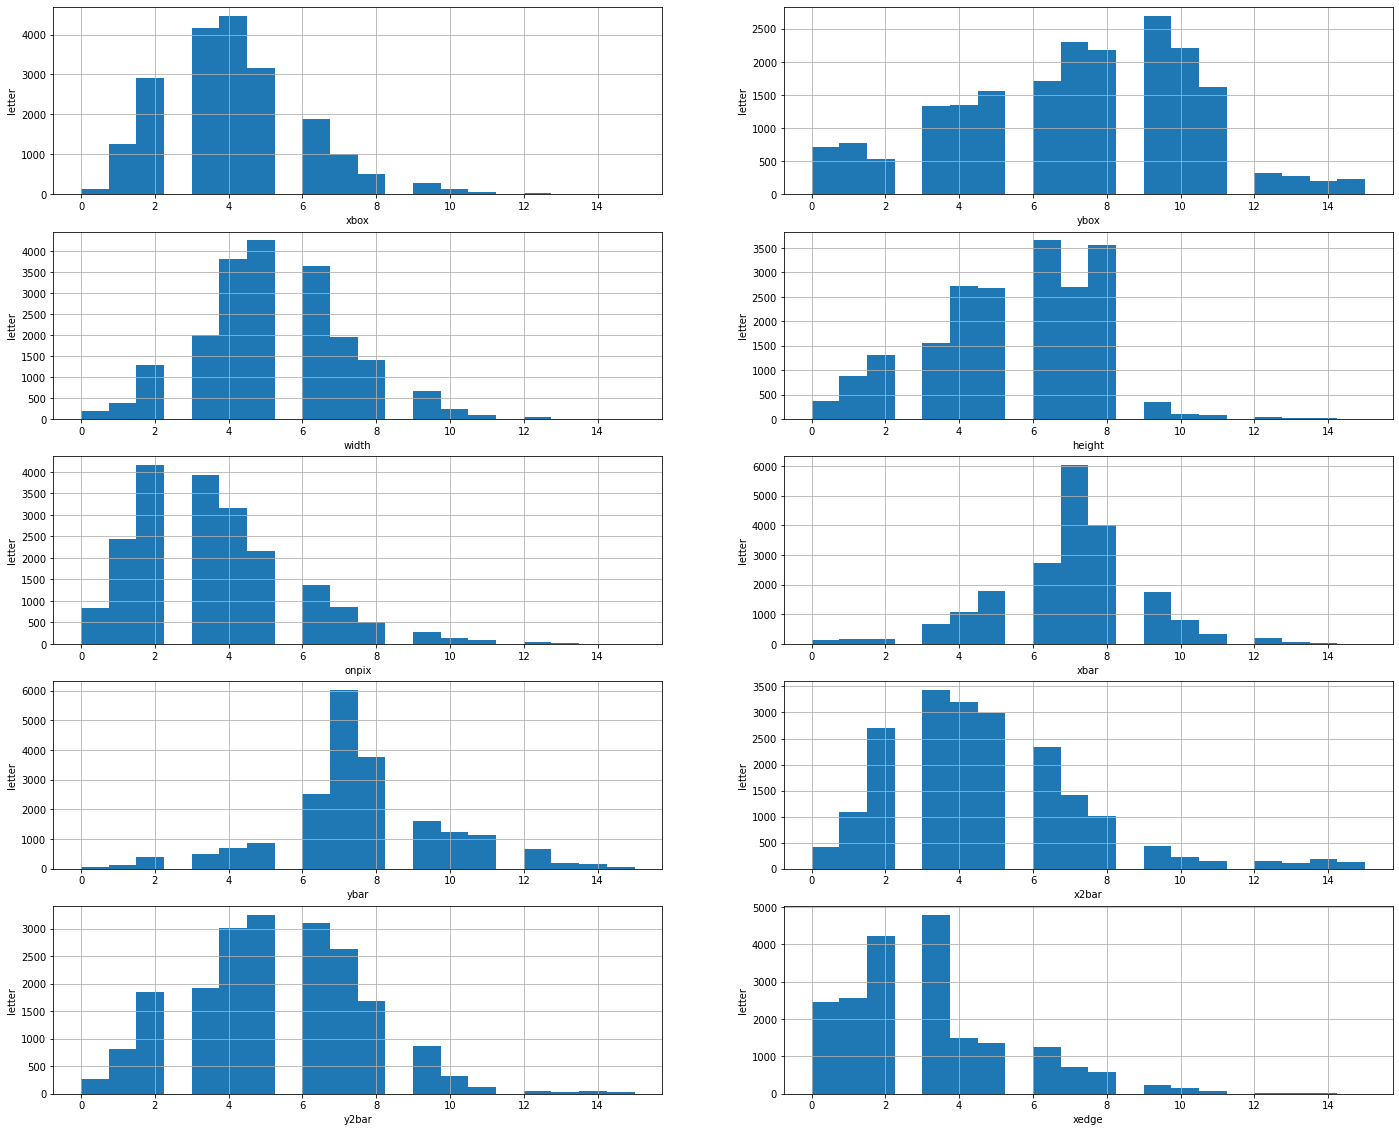

In [11]:
plt.figure(figsize=(24,20))


plt.subplot(5, 2, 1)
fig = df['xbox'].hist(bins=20)
fig.set_xlabel('xbox')
fig.set_ylabel('letter')


plt.subplot(5, 2, 2)
fig = df['ybox'].hist(bins=20)
fig.set_xlabel('ybox')
fig.set_ylabel('letter')

plt.subplot(5, 2, 3)
fig = df['width'].hist(bins=20)
fig.set_xlabel('width')
fig.set_ylabel('letter')

plt.subplot(5, 2, 4)
fig = df['height'].hist(bins=20)
fig.set_xlabel('height')
fig.set_ylabel('letter')

plt.subplot(5, 2, 5)
fig = df['onpix'].hist(bins=20)
fig.set_xlabel('onpix')
fig.set_ylabel('letter')

plt.subplot(5, 2, 6)
fig = df['xbar'].hist(bins=20)
fig.set_xlabel('xbar')
fig.set_ylabel('letter')

plt.subplot(5, 2, 7)
fig = df['ybar'].hist(bins=20)
fig.set_xlabel('ybar')
fig.set_ylabel('letter')

plt.subplot(5, 2, 8)
fig = df['x2bar'].hist(bins=20)
fig.set_xlabel('x2bar')
fig.set_ylabel('letter')

plt.subplot(5, 2, 9)
fig = df['y2bar'].hist(bins=20)
fig.set_xlabel('y2bar')
fig.set_ylabel('letter')

plt.subplot(5, 2, 10)
fig = df['xedge'].hist(bins=20)
fig.set_xlabel('xedge')
fig.set_ylabel('letter')



# EASIER WAY

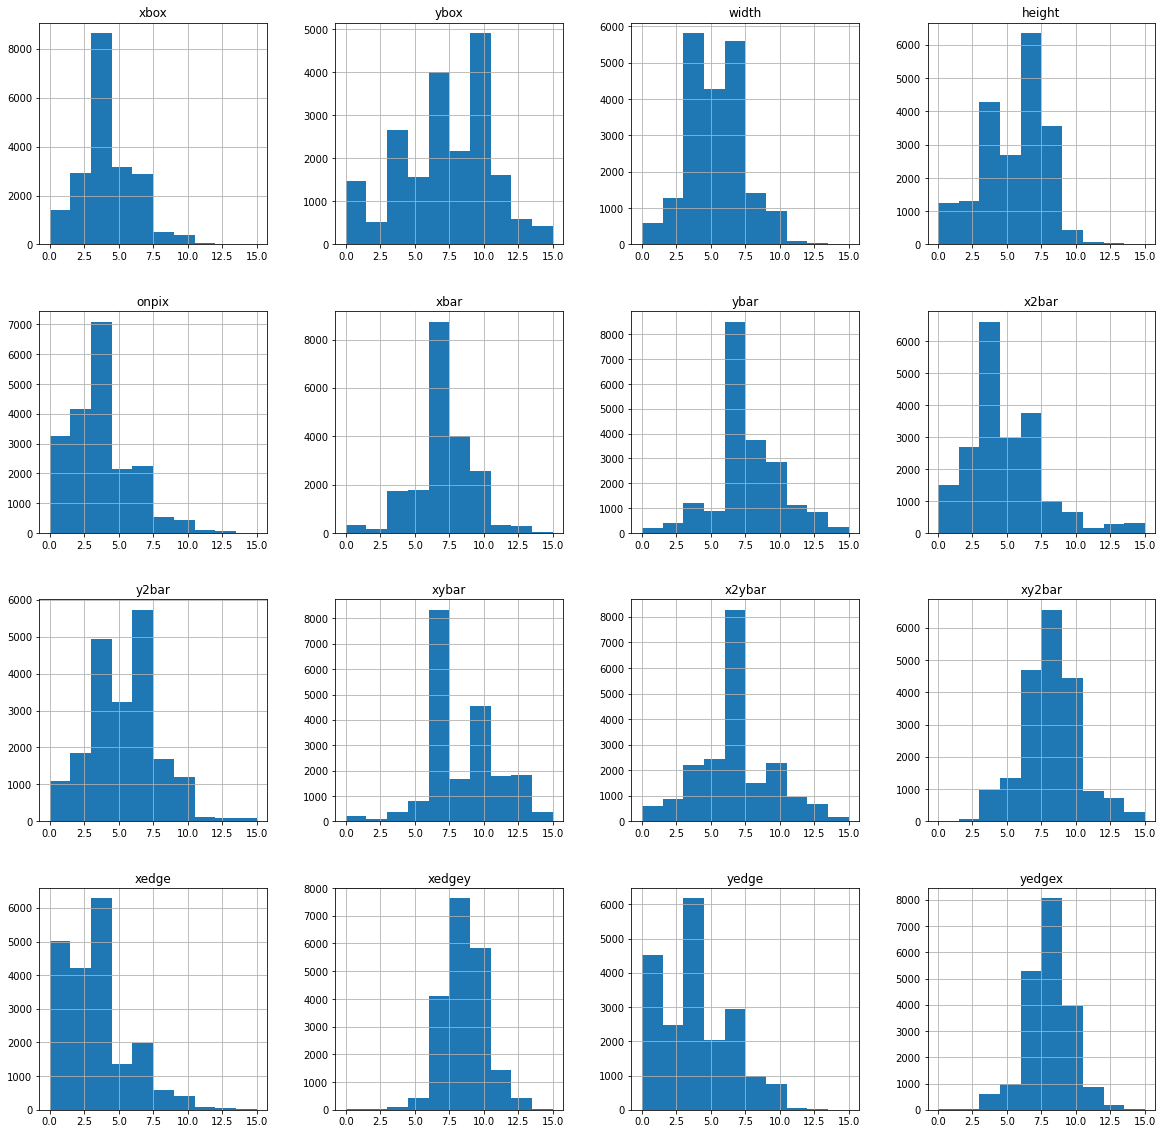

In [12]:
p = df.hist(figsize = (20,20))

None of the data is skewed.

In [13]:
X = df.drop(['letter'], axis=1)

y = df['letter']
X

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
X_train.shape, X_test.shape


((16000, 16), (4000, 16))

In [16]:
cols = X_train.columns
cols

Index(['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge',
       'yedgex'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [18]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04
mean,-4.463097e-17,9.359180e-17,4.263256e-17,2.664535e-18,4.440892e-18,4.041212e-17,6.794565e-17,5.262457e-17,-6.572520e-17,-2.593481e-16,-1.487699e-16,8.881784e-19,-1.687539e-17,-4.000134e-16,-3.197442e-17,-1.564304e-16
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-2.099664e+00,-2.133838e+00,-2.532818e+00,-2.372225e+00,-1.599408e+00,-3.403667e+00,-3.223370e+00,-1.716585e+00,-2.168609e+00,-3.335602e+00,-2.454246e+00,-3.824435e+00,-1.306847e+00,-5.406182e+00,-1.441915e+00,-4.816080e+00
25%,-5.356199e-01,-6.201557e-01,-5.553332e-01,-6.067252e-01,-6.877397e-01,-4.455910e-01,-6.428677e-01,-6.024468e-01,-4.927741e-01,-5.163721e-01,-5.491639e-01,-4.449726e-01,-4.502493e-01,-2.223383e-01,-6.619879e-01,-4.913233e-01
50%,-1.427190e-02,-1.468272e-02,-6.096214e-02,2.760249e-01,-2.319056e-01,4.742165e-02,-2.127839e-01,-2.310675e-01,-7.381531e-02,-1.136250e-01,-1.681473e-01,3.780774e-02,-2.195032e-02,-2.223383e-01,-2.720241e-01,1.264991e-01
75%,5.070761e-01,5.907903e-01,4.334090e-01,7.173999e-01,6.797626e-01,5.404343e-01,6.473836e-01,5.116910e-01,7.641023e-01,6.918691e-01,5.938857e-01,5.205881e-01,4.063487e-01,4.256422e-01,5.079034e-01,1.264991e-01
max,5.720556e+00,2.407209e+00,4.882749e+00,4.248400e+00,5.238104e+00,3.991523e+00,3.227886e+00,3.854104e+00,4.115773e+00,2.705604e+00,3.261001e+00,3.417270e+00,5.117637e+00,4.313525e+00,4.407541e+00,4.451256e+00


In [19]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score



# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Model accuracy score with polynomial kernel and C=100.0 : 0.9567


In [20]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[145   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  1 149   0   0   0   0   0   1   0   1   0   0   0   0   0   0   0   3
    0   0   0   3   0   0   0   0]
 [  0   0 154   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0 162   0   0   1   2   0   1   0   0   0   1   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 139   0   0   0   0   0   0   2   1   0   0   0   1   0
    0   0   0   1   0   0   0   0]
 [  1   1   1   0   1 157   1   1   0   0   0   0   0   0   0   3   0   0
    0   0   0   1   0   0   0   0]
 [  0   0   1   0   0   0 171   0   0   0   1   1   0   0   3   0   1   2
    0   0   0   2   0   0   0   0]
 [  0   1   0   0   0   1   0 113   0   0   1   0   1   1   3   0   0   1
    0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   2   0   0 119   6   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]


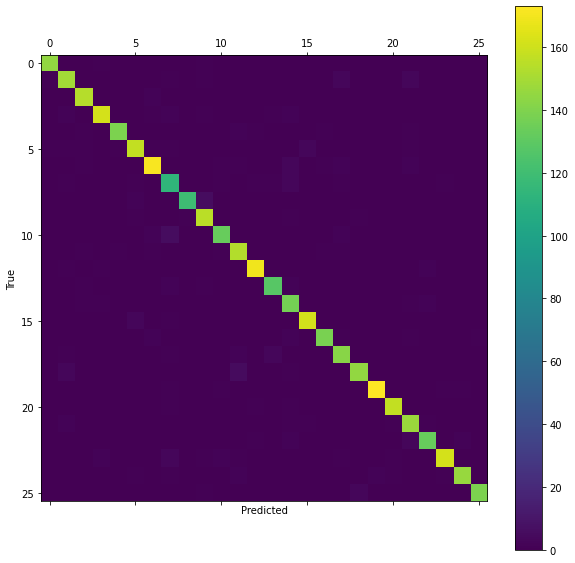

In [21]:
# visualize confusion matrix 

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# plot the matrix
cax = ax.matshow(cm)

# add colorbar for reference
fig.colorbar(cax)

# add labels to plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'B'),
 Text(0, 2.5, 'C'),
 Text(0, 3.5, 'D'),
 Text(0, 4.5, 'E'),
 Text(0, 5.5, 'F'),
 Text(0, 6.5, 'G'),
 Text(0, 7.5, 'H'),
 Text(0, 8.5, 'I'),
 Text(0, 9.5, 'J'),
 Text(0, 10.5, 'K'),
 Text(0, 11.5, 'L'),
 Text(0, 12.5, 'M'),
 Text(0, 13.5, 'N'),
 Text(0, 14.5, 'O'),
 Text(0, 15.5, 'P'),
 Text(0, 16.5, 'Q'),
 Text(0, 17.5, 'R'),
 Text(0, 18.5, 'S'),
 Text(0, 19.5, 'T'),
 Text(0, 20.5, 'U'),
 Text(0, 21.5, 'V'),
 Text(0, 22.5, 'W'),
 Text(0, 23.5, 'X'),
 Text(0, 24.5, 'Y'),
 Text(0, 25.5, 'Z')]

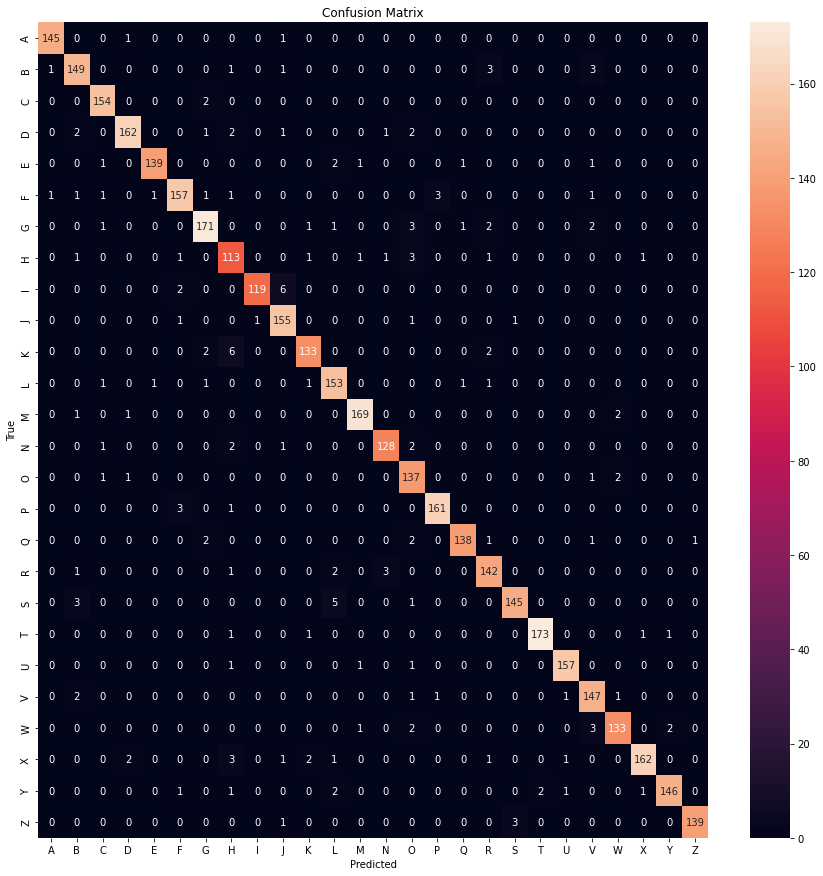

In [22]:
fig, ax = plt.subplots(figsize=(15, 15))

ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.xaxis.set_ticklabels(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
ax.yaxis.set_ticklabels(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])


In [23]:
y_test.values

array(['Y', 'B', 'K', ..., 'A', 'O', 'I'], dtype=object)

In [24]:

from sklearn.metrics import recall_score

# calculate recall
recall = recall_score(y_test, y_pred_test, average='macro')
print(recall)


0.9562811813461886
